In [1]:
import numpy as np 
import pandas as pd

# Visualtion
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Pretraitement. 
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

# Models.
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

# Evaluation.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import silhouette_score
from sklearn import metrics

# Time.
import time
import os          



In [2]:
flow_2021=pd.read_csv(r'C:\Adarsh_Work\Machine Learning\2021.02.15.csv')

In [141]:
flow_2021.sample(10)
# flow_2021['dest_ip'].unique()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
804798,0.00,0,0,786,445.0,0.000000,2,1,6,786,52616.0,1613403688300549,1613403688054093,0.0000,malicious,0.246456
412265,13.50,89,51,786,445.0,3.767107,2,2,6,786,52815.0,1613364140906372,1613364140878369,527.3949,malicious,0.028003
713242,278.75,270,191,786,445.0,4.586031,6,6,6,786,65114.0,1613387884200519,1613387882533061,2114.1604,outlier,1.667458
366282,0.00,0,0,786,47360.0,0.000000,1,0,6,786,9200.0,1613361754677896,1613361754677896,0.0000,benign,0.000000
656118,76.75,270,191,786,445.0,4.568678,6,6,6,786,8183.0,1613370881232154,1613370880638582,2106.1604,outlier,0.593572
826140,46.50,270,191,786,445.0,4.571072,6,6,6,786,58122.0,1613416544143797,1613416543802695,2107.2640,malicious,0.341102
296347,0.00,0,0,786,9200.0,0.000000,1,0,6,786,47358.0,1613361176944519,1613361176944519,0.0000,benign,0.000000
93301,97.00,270,191,786,445.0,4.568505,6,6,6,786,21694.0,1613354410748879,1613354409991308,2106.0810,outlier,0.757571
153092,0.00,0,422,786,47352.0,7.153348,1,0,6,786,9200.0,1613368229605307,1613368229605307,3018.7131,benign,0.000000
281875,0.00,0,0,786,47352.0,0.000000,1,0,6,786,9200.0,1613360829635937,1613360829635937,0.0000,benign,0.000000


In [142]:
# flow_copy=flow_2021()
# flow_2021=flow_2021.drop(columns='dest_ip')

In [143]:
flow_2021.dropna(inplace=True)



In [144]:
flow_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875764 entries, 0 to 878525
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   avg_ipt        875764 non-null  float64
 1   bytes_in       875764 non-null  int64  
 2   bytes_out      875764 non-null  int64  
 3   dest_ip        875764 non-null  int64  
 4   dest_port      875764 non-null  float64
 5   entropy        875764 non-null  float64
 6   num_pkts_out   875764 non-null  int64  
 7   num_pkts_in    875764 non-null  int64  
 8   proto          875764 non-null  int64  
 9   src_ip         875764 non-null  int64  
 10  src_port       875764 non-null  float64
 11  time_end       875764 non-null  int64  
 12  time_start     875764 non-null  int64  
 13  total_entropy  875764 non-null  float64
 14  label          875764 non-null  object 
 15  duration       875764 non-null  float64
dtypes: float64(6), int64(9), object(1)
memory usage: 113.6+ MB


In [145]:
# Remove the unnecessary columns. 
flow_2021.drop(["src_ip","dest_ip","time_end","time_start"],axis=1, inplace=True)

C:\Users\student\AppData\Local\Temp\ipykernel_4256\658446798.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(flow_2021.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0)


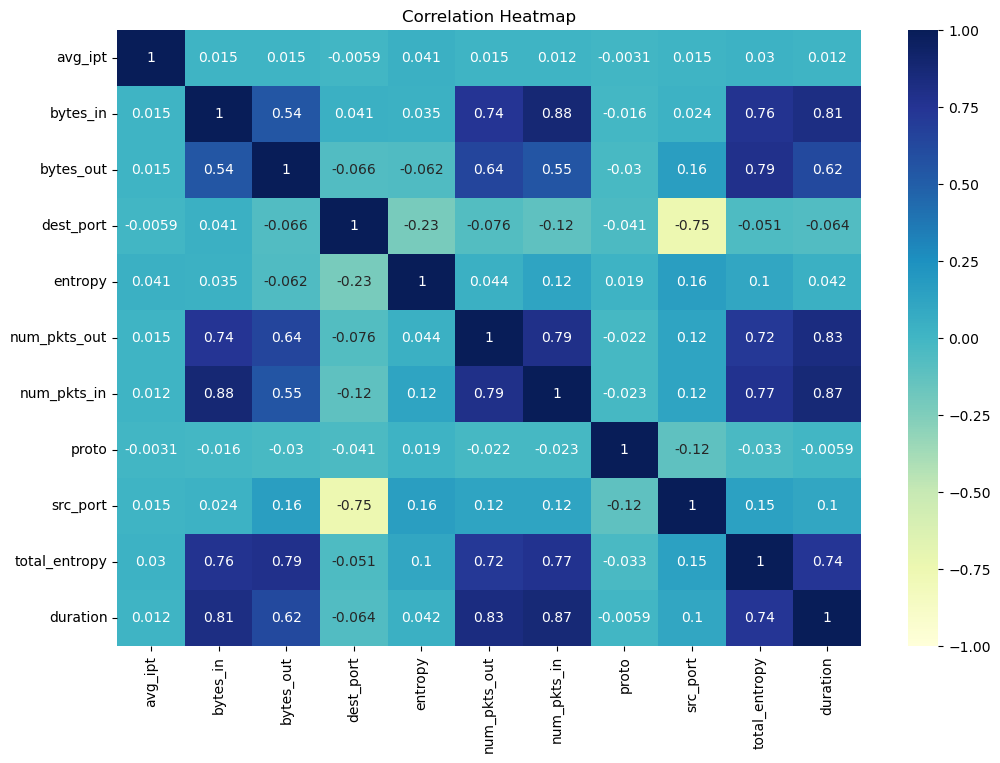

In [146]:
# Correlation heatmap. 
plt.figure(figsize=(12, 8)) # Plot size. 
sns.heatmap(flow_2021.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

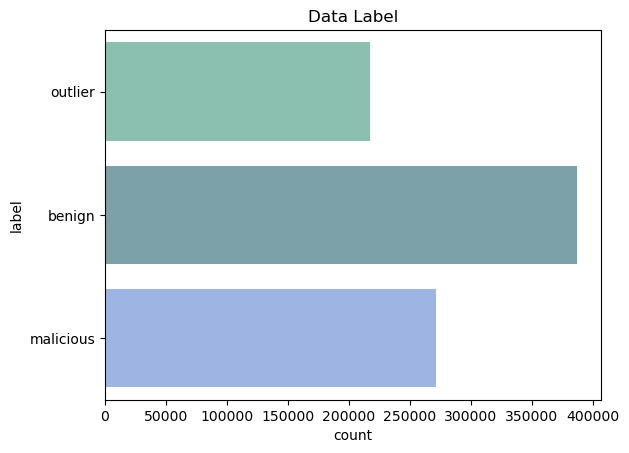

In [147]:
sns.countplot(y='label', data=flow_2021, saturation=0.7, palette=['#7fccb6','#74a7b2','#8faff2'])
plt.title('Data Label')
plt.show()

In [148]:
flow_2021['label'].value_counts()

benign       387301
malicious    271570
outlier      216893
Name: label, dtype: int64

In [149]:
#Separating the data.
X = flow_2021[['avg_ipt','bytes_in','bytes_out','dest_port','entropy','num_pkts_out',
        'num_pkts_in','proto','src_port','total_entropy','duration']]
y = flow_2021['label']

In [150]:
# Setting a dictionary to encode the label.
mapping = {'benign': 1, 'malicious': 0, 'outlier': 2}

In [151]:
# Enocde the values.
# encoder = LabelEncoder().fit(list(mapping.keys()))
y_true = [mapping[x] for x in y]

In [152]:
y_true

[2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,


In [153]:
counted_values = Counter(y_true)
print(counted_values)

Counter({1: 387301, 0: 271570, 2: 216893})


In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.25, random_state=42,stratify=y_true)

In [155]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
# from sklearn.ensemble import RandomForestClassifier

In [156]:
# XGBoost with GridSearchCV
# xgb_params = {'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}



xgb_model = XGBClassifier(max_depth=5)
# xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='accuracy')
xgb_model.fit(X_train, y_train)
# xgb_best_model = xgb_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [157]:
from sklearn.metrics import classification_report

In [158]:
# xgb_pred = xgb_model.predict(X_test)
# report = classification_report(y_test, xgb_pred)
# print(f'XGBoost Report:\n {report}')

In [159]:
xgb_pred = xgb_model.predict(X_test)
report = classification_report(y_test, xgb_pred)
print(f'XGBoost Report:\n {report}')

XGBoost Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87     67893
           1       1.00      1.00      1.00     96825
           2       0.87      0.76      0.82     54223

    accuracy                           0.91    218941
   macro avg       0.90      0.89      0.89    218941
weighted avg       0.92      0.91      0.91    218941



In [160]:
xgb_pred = xgb_model.predict(X_train)
report = classification_report(y_train, xgb_pred)
print(f'XGBoost Report:\n {report}')

XGBoost Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87    203677
           1       1.00      1.00      1.00    290476
           2       0.88      0.77      0.82    162670

    accuracy                           0.92    656823
   macro avg       0.90      0.89      0.90    656823
weighted avg       0.92      0.92      0.92    656823



In [161]:
xgb_pred = xgb_model.predict(X_train)
report = classification_report(y_train, xgb_pred)
print(f'XGBoost Report:\n {report}')

XGBoost Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87    203677
           1       1.00      1.00      1.00    290476
           2       0.88      0.77      0.82    162670

    accuracy                           0.92    656823
   macro avg       0.90      0.89      0.90    656823
weighted avg       0.92      0.92      0.92    656823



In [162]:
xgb_model.feature_importances_

array([0.02526739, 0.02947278, 0.04388002, 0.5241487 , 0.049849  ,
       0.01593369, 0.01335215, 0.09271625, 0.12368713, 0.05152873,
       0.03016413], dtype=float32)

In [173]:
X_train.columns

Index(['avg_ipt', 'bytes_in', 'bytes_out', 'dest_port', 'entropy',
       'num_pkts_out', 'num_pkts_in', 'proto', 'src_port', 'total_entropy',
       'duration'],
      dtype='object')

In [163]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=8)

# parameters = {'max_depth': randint(2, 10), 'min_samples_split': randint(2, 10), 'min_samples_leaf': [1, 2, 3, 4, 5], 'criterion': ['gini', 'entropy']}

# random_search = RandomizedSearchCV(dt, param_distributions=parameters, n_iter=20, cv=5, n_jobs=-1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [164]:
from sklearn import metrics
# dt = DecisionTreeClassifier(**random_search.best_params_)
dt.fit(X_train,y_train)

# Predicting Train & Test Results
y_dt = dt.predict(X_train)
y_pred_dt = dt.predict(X_test)

# Accuracy
print("Accuracy on Training set: ",metrics.accuracy_score(y_train, y_dt))
print("Accuracy on Testing set: ",metrics.accuracy_score(y_test, y_pred_dt))

Accuracy on Training set:  0.8452337996690128
Accuracy on Testing set:  0.8447983703372142


In [174]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,max_depth=5,min_samples_leaf=20)

# parameters = {'n_estimators': randint(50, 100), 'max_depth': randint(2, 8), 'min_samples_split': randint(2, 10),
#               'min_samples_leaf': randint(1, 10), 'max_features': ['sqrt', 'log2', None]}

# random_search = RandomizedSearchCV(rf, n_iter=20, cv=5, n_jobs=-1)
rf.fit(X_train, y_train)
# best_accuracy = rf.accuracy
# best_parameters = rf.best_params_

# print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
# print("Best Parameters:", best_parameters)

RandomForestClassifier(max_depth=5, min_samples_leaf=20, n_estimators=200)

In [175]:
y_rf = rf.predict(X_train)
y_pred_rf = rf.predict(X_test)


# Accuracy
print("Accuracy on Training set: ",metrics.accuracy_score(y_train, y_rf))
print("Accuracy on Testing set: ",metrics.accuracy_score(y_test, y_pred_rf))

Accuracy on Training set:  0.8183422322299919
Accuracy on Testing set:  0.818809633645594


In [167]:
from sklearn.metrics import classification_report

# generate classification report
target_names = ['0', '1','2']
print(classification_report(y_test, y_pred_dt, target_names=target_names))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75     67893
           1       1.00      1.00      1.00     96825
           2       0.70      0.67      0.68     54223

    accuracy                           0.84    218941
   macro avg       0.81      0.81      0.81    218941
weighted avg       0.84      0.84      0.84    218941



In [168]:
from sklearn.metrics import classification_report

# generate classification report
target_names = ['0', '1','2']
print(classification_report(y_test, y_pred_rf, target_names=target_names))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     67893
           1       1.00      1.00      1.00     96825
           2       0.86      0.84      0.85     54223

    accuracy                           0.93    218941
   macro avg       0.91      0.91      0.91    218941
weighted avg       0.93      0.93      0.93    218941



In [169]:
from sklearn.metrics import confusion_matrix

In [170]:
y_rf = rf.predict(X_train)
y_pred_rf = rf.predict(X_test)

# Accuracy
print("Accuracy on Training set: ",metrics.accuracy_score(y_train, y_rf))
print("Accuracy on Testing set: ",metrics.accuracy_score(y_test, y_pred_rf))

Accuracy on Training set:  0.9931808112687893
Accuracy on Testing set:  0.9270853791660767


In [171]:
confusion_matrix(y_test, y_pred_rf)

array([[60689,    17,  7187],
       [    6, 96819,     0],
       [ 8754,     0, 45469]], dtype=int64)

In [172]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     67893
           1       1.00      1.00      1.00     96825
           2       0.86      0.84      0.85     54223

    accuracy                           0.93    218941
   macro avg       0.91      0.91      0.91    218941
weighted avg       0.93      0.93      0.93    218941

